# Preparation de données pour un organisme de santé publique

#### Dans le cadre de l'amélioration de sa base de données OpenFood Facts, l'agence de santé publique France m'a sollicité afin de déterminer la faisabilité d'une création d'application d'auto-complétion des informations relatives aux produits que les utilisateurs suggèrent à l'organisme.

![Santé Publique France](https://upload.wikimedia.org/wikipedia/fr/5/50/Sante-publique-France-logo.svg)

Open Food Facts est un projet associatif et citoyen, né en France en 2012 et porté depuis par des milliers de bénévoles dans le monde entier.

A travers la création de cette base de produits alimentaires l'Agence de Santé Publique France met en place des outils et solutions qui sont directement utilisables par toutes et tous, et qui nourrissent également le débat public pour à la fois apporter des données concrètes aux pouvoirs publics et aux législateurs, et encourager l'industrie à proposer de meilleurs produits.

La base de données de l'Agence de Santé Publique France permet de comprendre et d'évaluer la qualité nutritionnelle des aliments et des produits alimentaires disponibles sur le marché par le biais du Nutriscore, un système d'étiquetage nutritionnel développé pour informer les consommateurs sur la qualité nutritionnelle des produits alimentaires et les aider à faire des choix plus éclairés en matière de santé.

Les données collectées sur OpenFood Facts sont utilisées pour éduquer, développer de nouveaux produits et services, et aider la recherche scientifique.



## Étude de faisabilité pour l'ajout de la fonction d'auto-complétion du champ de données d'un nouveau produit

### Introduction :

Dans un monde numérique en constante évolution, les entreprises et organisations doivent s'adapter rapidement aux besoins et aux attentes changeantes de leurs utilisateurs. 

OpenFood Facts joue un rôle essentiel dans l'évaluation des produits de consommation des consommateurs. L'intégration de nouvelles fonctionnalité sur leur plateforme permettraient de conserver leur attractibilité aux yeux du grand public et faciliterait l'appétence des utilisateurs à renseigner de nouveaux produits sur la plateforme.

Cependant, avant de se lancer dans le développement d'une nouvelle fonctionnalité, il est primordial de réaliser une étude de faisabilité approfondie. Cette étude vise à évaluer la viabilité, les risques et les avantages potentiels associés à l'intégration de la fonctionnalité envisagée. Une analyse approfondie permettra de déterminer si le projet est réalisable, de définir les contraintes et les ressources nécessaires, et d'éviter des investissements inutiles ou mal ciblés.

Cette étude de faisabilité se concentrera sur la création d'une application d'auto-complétion des informations relatives aux produits que les utilisateurs suggèrent à la plateforme, qui répond à un besoin identifié par l'entreprise et à des attentes des utilisateurs en constante évolution.

La sécurité et la protection des données seront également au cœur de notre analyse, car toute nouvelle fonctionnalité doit garantir la confidentialité et l'intégrité des informations des utilisateurs. Nous évaluerons les risques potentiels et proposerons des mesures de sécurité appropriées pour prévenir les menaces potentielles.

En conclusion, cette étude de faisabilité offrira des informations essentielles pour la prise de décision concernant l'intégration de cette nouvelle fonctionnalité sur la plateforme OpenFood Facts. Elle aidera à identifier les opportunités, les risques et les contraintes potentielles, permettant ainsi à l'entreprise de réaliser un investissement stratégique et judicieux, garantissant une expérience en ligne supérieure pour ses utilisateurs et renforçant son attractivité.

## Table des matières


#### [1.Nettoyage du Dataset](#1.-Nettoyage-du-Dataset)
#### - [A.Traitement des valeurs aberrantes](#A.-Traitement-des-valeurs-aberrantes)
#### - [B.Traitement des valeurs manquantes](#B.-Traitement-des-valeurs-manquantes)

#### [2.Analyse exploratoire du Dataset](#2.-Analyse-exploratoire-du-Dataset)
#### - [A.Analyse univariées](#A.-Analyse-univariées)
#### - [B.Analyse bivariées](#B.-Analyse-bivariées)
#### - [C.Analyse multivariées](#C.-Analyse-multivariées)

## 1. Nettoyage du Dataset

Nous commençons notre étude par une pré-analyse du Dataset fourni par la plateforme OpenFood Facts pour déterminer les aspects du nettoyage du jeu de données sur lesquels il faudra porter attention.

#### Le fichier est un fichier brut en .CSV et nécessite un délimitateur spécifique au format "\t".

#### Le fichier comporte 320772 individus avec 162 variables.

In [263]:
import pandas as pd
import numpy as np

data = pd.read_csv('openfoodfacts.csv', sep='\t', low_memory=False)
pd.set_option('display.max_columns', None) #permet d'afficher toutes les colonnes
data

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,NaN,28 g (1 ONZ),NaN,0.0,[ bananas -> en:bananas ]

#### Une analyse métier permet de sélectionner les variables utiles à l'étude du jeu de données.

#### Nous effectuons alors une sélection des données sur les variables que nous souhaiterons étudier.

In [264]:
selected_columns = ['product_name', 'nutrition_grade_fr',\
                    'energy_100g', 'proteins_100g',\
                    'sugars_100g', 'carbohydrates_100g', 'fat_100g',\
                    'saturated-fat_100g', 'salt_100g', 'sodium_100g', 'fiber_100g']
new_df = data[selected_columns].copy()
new_df

,product_name,nutrition_grade_fr,energy_100g,proteins_100g,sugars_100g,carbohydrates_100g,fat_100g,saturated-fat_100g,salt_100g,sodium_100g,fiber_100g
0,Farine de blé noir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Banana Chips Sweetened (Whole),d,2243.0,3.57,14.29,64.29,28.57,28.57,0.00000,0.000,3.6
2,Peanuts,b,1941.0,17.86,17.86,60.71,17.86,0.00,0.63500,0.250,7.1
3,Organic Salted Nut Mix,d,2540.0,17.86,3.57,17.86,57.14,5.36,1.22428,0.482,7.1
4,Organic Polenta,NaN,1552.0,8.57,NaN,77.14,1.43,NaN,NaN,NaN,5.7
...,...,...,...,...,...,...,...,...,...,...,...
320767,Tomato & ricotta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",b,0.0,0.00,0.00,0.00,0.00,0.00,0.00000,0.000,0.0
320769,乐吧泡菜味薯片,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,Tomates aux Vermicelles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Nous pouvons désormais débuter notre analyse du jeu de données en décrivant le type des variables, leurs répartions et en affichant le pourcentage de valeurs manquantes

In [265]:
new_df.dtypes

product_name           object
nutrition_grade_fr     object
energy_100g           float64
proteins_100g         float64
sugars_100g           float64
carbohydrates_100g    float64
fat_100g              float64
saturated-fat_100g    float64
salt_100g             float64
sodium_100g           float64
fiber_100g            float64
dtype: object

In [266]:
new_df.describe()

,energy_100g,proteins_100g,sugars_100g,carbohydrates_100g,fat_100g,saturated-fat_100g,salt_100g,sodium_100g,fiber_100g
count,2.611130e+05,259922.000000,244971.000000,243588.000000,243891.000000,229554.000000,255510.000000,255463.000000,200886.000000
mean,1.141915e+03,7.075940,16.003484,32.073981,12.730379,5.129932,2.028624,0.798815,2.862111
std,6.447154e+03,8.409054,22.327284,29.731719,17.578747,8.014238,128.269454,50.504428,12.867578
min,0.000000e+00,-800.000000,-17.860000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.700000
25%,3.770000e+02,0.700000,1.300000,6.000000,0.000000,0.000000,0.063500,0.025000,0.000000
50%,1.100000e+03,4.760000,5.710000,20.600000,5.000000,1.790000,0.581660,0.229000,1.500000
75%,1.674000e+03,10.000000,24.000000,58.330000,20.000000,7.140000,1.374140,0.541000,3.600000
max,3.251373e+06,430.000000,3520.000000,2916.670000,714.290000,550.000000,64312.800000,25320.000000,5380.000000


In [267]:
Nan_values = new_df.isnull().sum()
total_values = len(data)
Nan_values_percentage = (Nan_values / total_values) * 100
Nan_values_percentage = round(Nan_values_percentage, 2)
print(Nan_values_percentage)

product_name           5.54
nutrition_grade_fr    31.04
energy_100g           18.60
proteins_100g         18.97
sugars_100g           23.63
carbohydrates_100g    24.06
fat_100g              23.97
saturated-fat_100g    28.44
salt_100g             20.35
sodium_100g           20.36
fiber_100g            37.37
dtype: float64


#### Nous pouvons également afficher les données manquantes graphiquement

<Axes: >

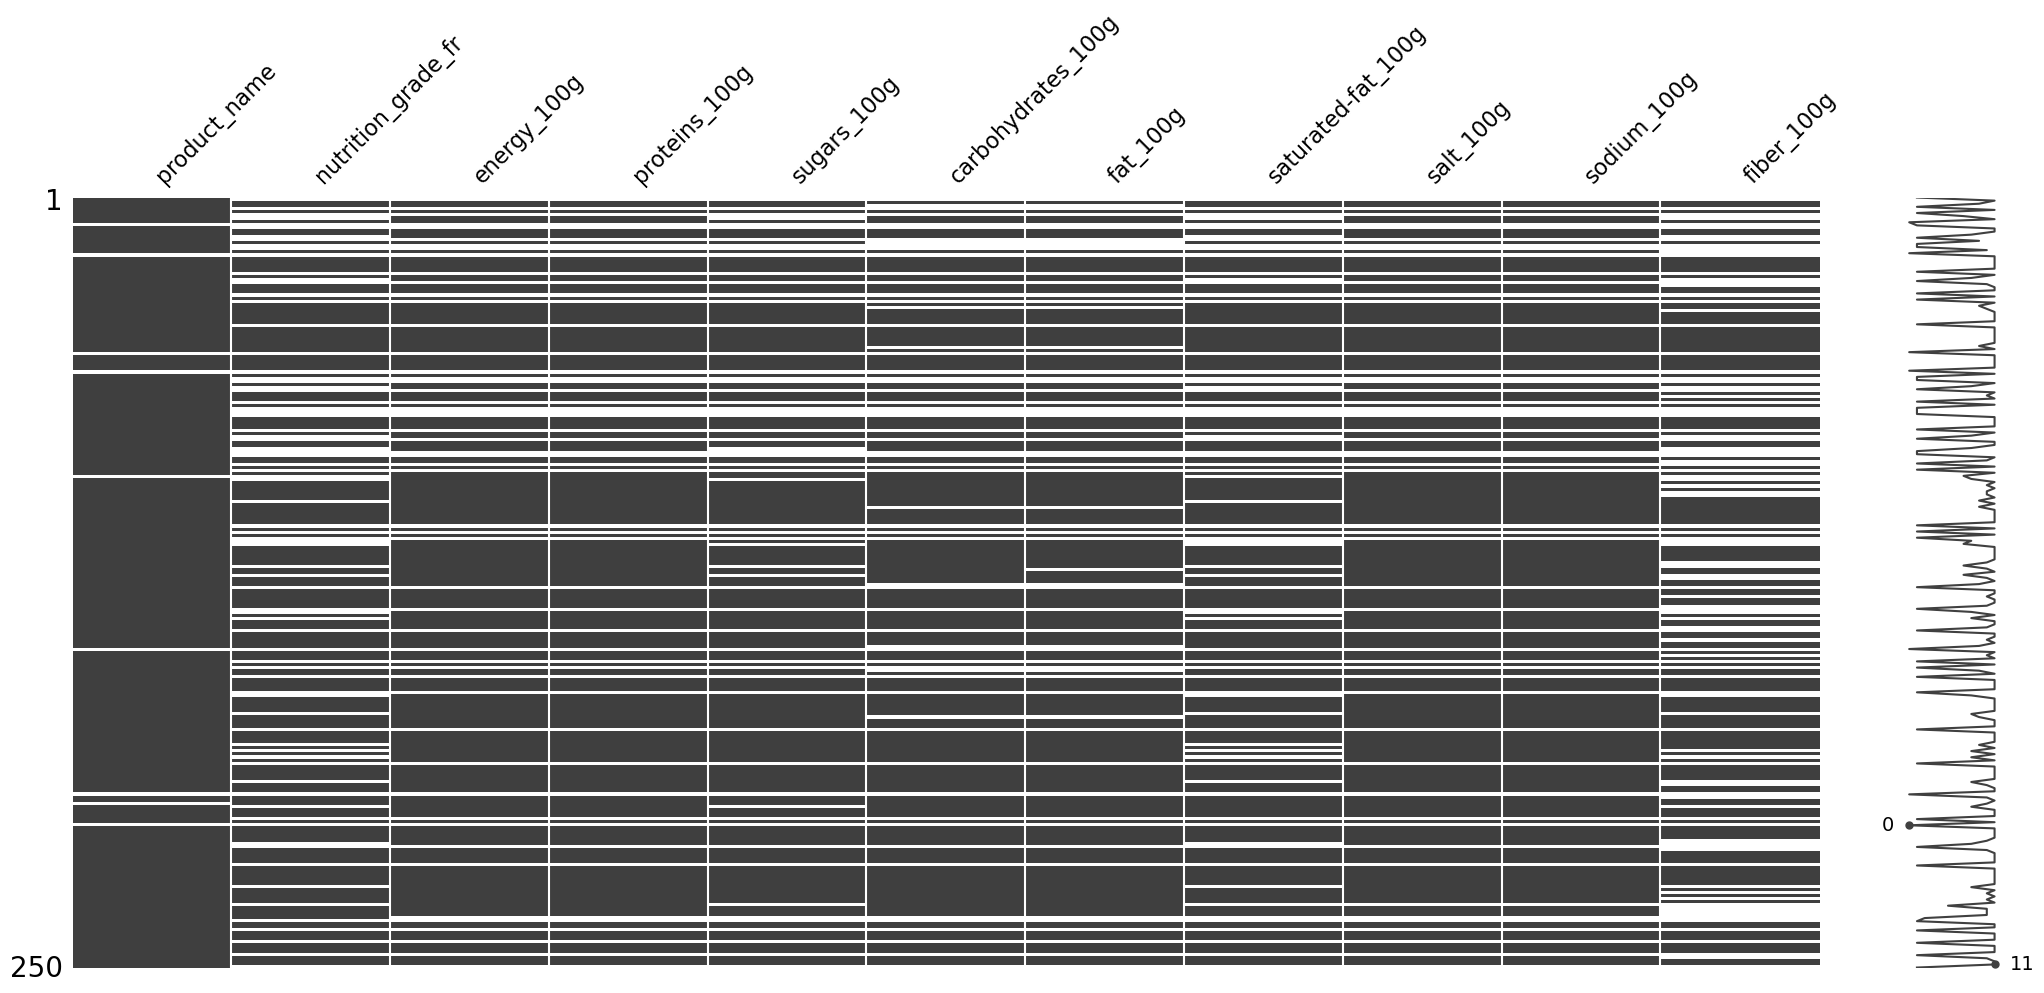

In [268]:
import missingno as msno
%matplotlib inline
msno.matrix(new_df.sample(250))

#### On peut constater un grand nombre de valeurs manquantes dans le Dataset

#### Nous pouvons vérifier si le Dataset comporte des duplicatas de données

In [269]:
new_df[new_df.duplicated()]

,product_name,nutrition_grade_fr,energy_100g,proteins_100g,sugars_100g,carbohydrates_100g,fat_100g,saturated-fat_100g,salt_100g,sodium_100g,fiber_100g
152,Peanuts,b,1941.0,17.86,17.86,60.71,17.86,0.0,0.635,0.25,7.1
183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
320753,Lager,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320754,nf test,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320760,Poireaux,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Conclusion de la pré-analyse du Dataset

Nous pouvons constater que le jeu de données comporte de nombreuses données manquantes et de doublons qu'il sera difficile d'identifier tant leur nombre est important.

Un travail de nettoyage est alors primordial sans lequel cette étude ne pourrait pas être réalisée.

## A. Traitement des valeurs aberrantes

Le nettoyage du jeu de données de ses valeurs aberrante nous permettra d'écarter les données qui pourraient altérer les résultats obtenus et ainsi invalider notre étude.

#### Certaines variables sont mals renseignés et ne permettent pas de les manipuler, il est donc judicieux de les corriger dès le début du nettoyage du Dataset

In [270]:
new_df.rename(columns={"saturated-fat_100g" : "saturated_fat_100g"\
                       , "fruits-vegetables-nuts_100g" : "fruits_vegetables_nuts_100g"},\
              inplace=True)

#### Nous pouvons désormais travailler sur les données aberrantes du jeu de données, en l'occurence les valeurs supérieures à 100 pour des paramètres ne pouvant pas prendre de valeurs au dessus de 100 et enfin les valeurs négatives.

In [271]:
index_drop_rogue_value = new_df[new_df['proteins_100g'] > 100].index
new_df.drop(index_drop_rogue_value, inplace=True)
index_drop_rogue_value = new_df[new_df['sugars_100g'] > 100].index
new_df.drop(index_drop_rogue_value, inplace=True)
index_drop_rogue_value = new_df[new_df['carbohydrates_100g'] > 100].index
new_df.drop(index_drop_rogue_value, inplace=True)
index_drop_rogue_value = new_df[new_df['fat_100g'] > 100].index
new_df.drop(index_drop_rogue_value, inplace=True)
index_drop_rogue_value = new_df[new_df['saturated_fat_100g'] > 100].index
new_df.drop(index_drop_rogue_value, inplace=True)
index_drop_rogue_value = new_df[new_df['salt_100g'] > 100].index
new_df.drop(index_drop_rogue_value, inplace=True)
index_drop_rogue_value = new_df[new_df['fiber_100g'] > 100].index
new_df.drop(index_drop_rogue_value, inplace=True)
index_drop_rogue_value = new_df[new_df['proteins_100g'] < 0].index
new_df.drop(index_drop_rogue_value, inplace=True)
index_drop_rogue_value = new_df[new_df['sugars_100g'] < 0].index
new_df.drop(index_drop_rogue_value, inplace=True)
index_drop_rogue_value = new_df[new_df['fiber_100g'] < 0].index
new_df.drop(index_drop_rogue_value, inplace=True)

#### Nous nous interessons désormais aux outliers du paramètre 'energy_100g'

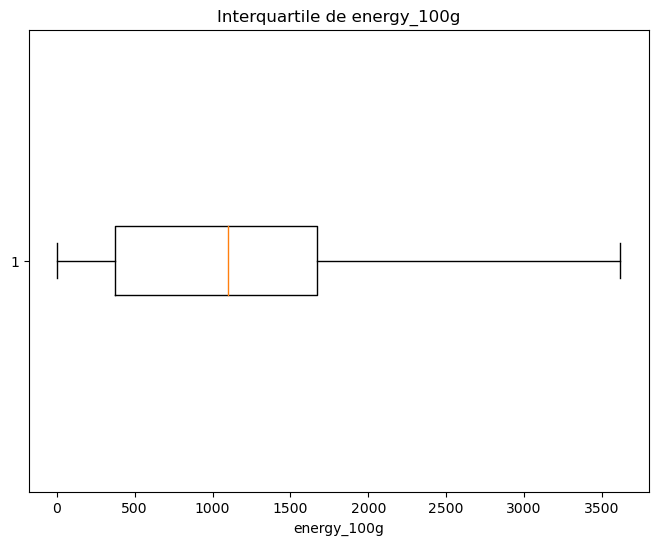

In [274]:
import matplotlib.pyplot as plt
df_energy = pd.DataFrame(new_df['energy_100g'])
df_temporary = df_energy.dropna().copy()

plt.figure(figsize=(8, 6))
plt.boxplot(df_temporary.values, vert=False, showfliers=False)
plt.xlabel('energy_100g')
plt.title('Interquartile de energy_100g')

plt.show()

In [275]:
q1 = np.percentile(df_temporary, 25)
q3 = np.percentile(df_temporary, 75)
interquartile = q3 - q1
outliers = q3 + 1.5 * interquartile
outliers

3619.5

#### Nous pouvons rapidement constater que le paramètre 'energy_100g' oscille entre 0 et 3619.5.
#### Après une recherche métier nous constatons que l'aliment ayant le plus de kilojoules est l'huile d'avocat avec 3765kJ.
#### Cette analyse métier est cohérente avec nos observations.
#### Nous supprimons alors toutes les valeurs au dessus de 3619.5.

In [276]:
index_drop_value = new_df[new_df['energy_100g'] > 3619.5].index
new_df.drop(index_drop_value, inplace=True)

## B. Traitement des valeurs manquantes

Le traitement des valeurs manquantes est une étape importante de notre étude car ces valeurs ne permettent pas d'observer la réprésentation des variables de chaque individus.

#### Lorsque le nom du produit n'est pas renseigné il est impossible de le retrouver de quelque manière que ce soit, il est donc préférable de le supprimer pour simplifier notre étude

In [277]:
index_null_value = new_df[new_df['product_name'].isnull()].index
new_df.drop(index_null_value , inplace=True)
print((len(index_null_value)/len(new_df)*100, 2))

(5.8798187969949725, 2)


#### Lorsque aucune données ne sont renseignées pour un individu il est préférable de le supprimer pour faciliter notre travail.
#### On affiche également le pourcentage de suppression dans le Dataset

In [278]:
df_index_drop = []
for i in new_df.itertuples():
    if pd.isna(i.energy_100g)\
    & pd.isna(i.proteins_100g)\
    & pd.isna(i.sugars_100g)\
    & pd.isna(i.fat_100g)\
    & pd.isna(i.salt_100g)\
    & pd.isna(i.sodium_100g)\
    & pd.isna(i.fiber_100g)\
    & pd.isna(i.saturated_fat_100g)\
    & pd.isna(i.carbohydrates_100g)\
    & pd.isna(i.nutrition_grade_fr):
        df_index_drop.append(i.Index)
        
len_list = len(df_index_drop)
print(round(len_list/len(new_df)*100, 2))
df = new_df.drop(df_index_drop).copy()

14.45


#### Comme nous pouvons le constater certaines variables n'ont pas pu être encore traitée, il faudra alors effectuer un nettoyage plus complexe pour réussir à déterminer les valeurs manquantes de ces variables ou les supprimer

<Axes: >

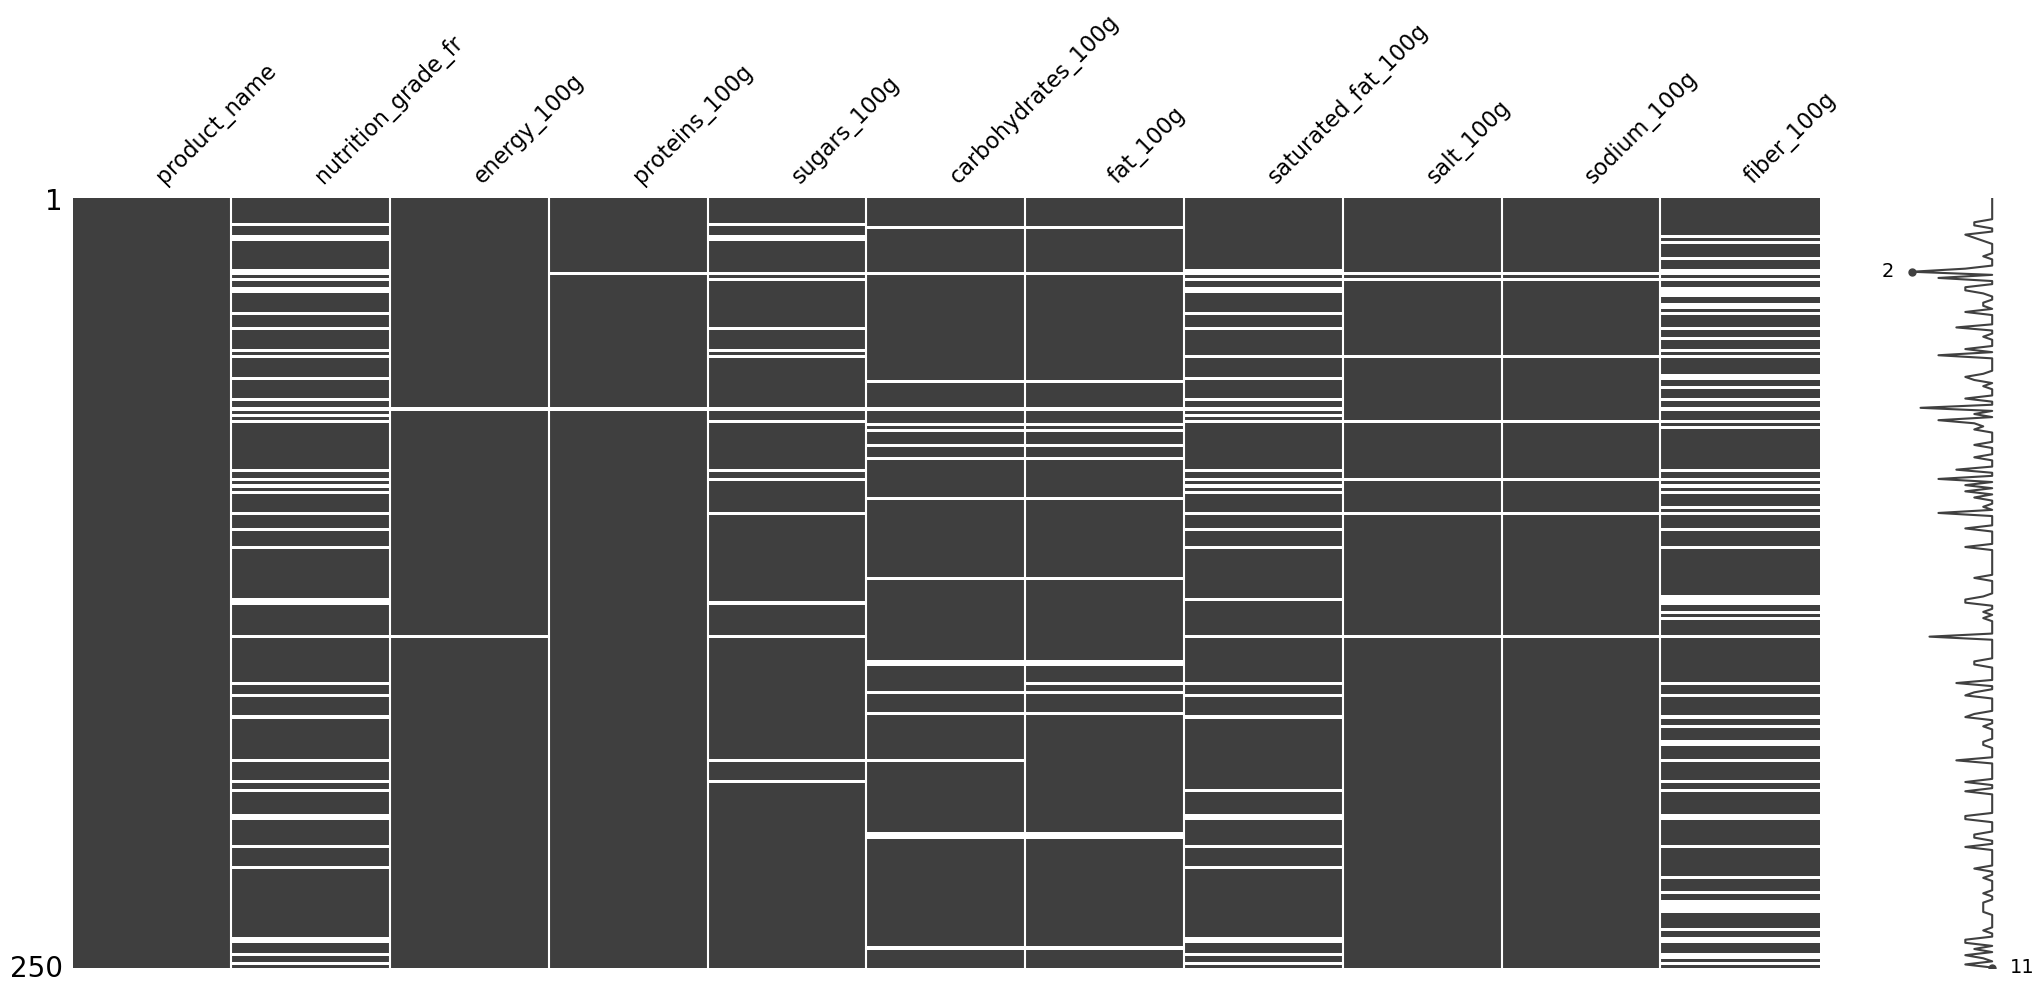

In [280]:
msno.matrix(df.sample(250))

#### Pour parvenir à retrouver les valeurs manquantes nous pourrons utiliser une fonction IterativeImputer, mais pour cela il faut qu'il y ai un corrélation entre les variables pour pouvoir applique ce type de fonction.

#### On commence par utiliser seulement les individus n'ayant pas de données manquantes dans leur variable pour détecter les corrélations qu'ils pourraient avoir entre eux

In [281]:
df_index_drop = []
for i in df.itertuples():
    if pd.isna(i.energy_100g)\
    | pd.isna(i.proteins_100g)\
    | pd.isna(i.sugars_100g)\
    | pd.isna(i.fat_100g)\
    | pd.isna(i.salt_100g)\
    | pd.isna(i.sodium_100g)\
    | pd.isna(i.fiber_100g)\
    | pd.isna(i.saturated_fat_100g)\
    | pd.isna(i.carbohydrates_100g)\
    | pd.isna(i.nutrition_grade_fr):
        df_index_drop.append(i.Index)
        
df_without_Nan = df.drop(df_index_drop).copy()

#### Puis nous représentons graphiquement une heatmap de la corrélation de Pearson qui permet de détecter les corrélations entre différentes variables lorsqu'une case s'approche de la couleur rouge.

/var/folders/kl/3nc79ycx61v13jbqlw61nnfw0000gn/T/ipykernel_18419/638499555.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_without_Nan.corr()


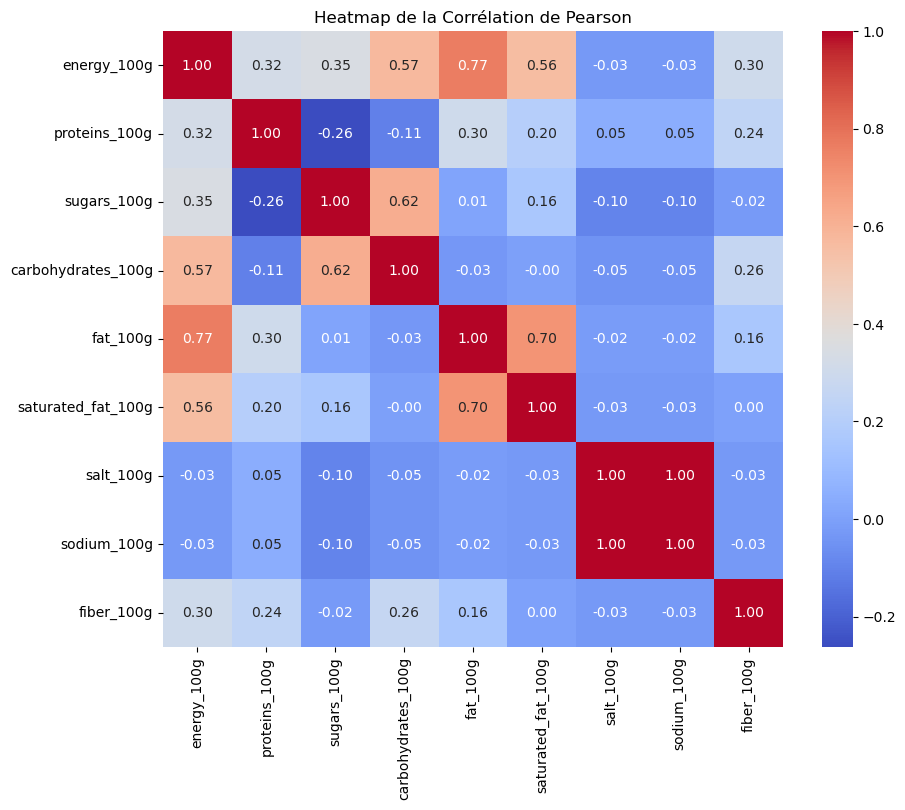

In [282]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df_without_Nan.corr()

plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap de la Corrélation de Pearson')
plt.show()

#### On peut alors constater une corrélation entre les variables 'salt_100g' et 'sodium_100g' également entre les variables 'fat_100g' et 'satured_fat_100g, entre les variables 'energy_100g' et 'fat_100g' et enfin entre les variables 'carbohydrates_100g' et 'sugars_100g'

#### On utilise alors la fonction IterativeImputer pour imputer aux valeurs manquantes une valeurs interdépendantes avec sa variable de corrélation 

In [283]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer()
df['fat_100g'] = imputer.fit_transform(df[['fat_100g', 'saturated_fat_100g']])[:, 0]
df['saturated_fat_100g'] = imputer.fit_transform(df[['saturated_fat_100g', 'fat_100g']])[:, 0]
df['energy_100g'] = imputer.fit_transform(df[['energy_100g', 'fat_100g']])[:, 0]
df['carbohydrates_100g'] = imputer.fit_transform(df[['carbohydrates_100g', 'sugars_100g']])[:, 0]
df['sugars_100g'] = imputer.fit_transform(df[['sugars_100g', 'carbohydrates_100g']])[:, 0]

In [284]:
df.describe()

,energy_100g,proteins_100g,sugars_100g,carbohydrates_100g,fat_100g,saturated_fat_100g,salt_100g,sodium_100g,fiber_100g
count,258147.000000,255431.000000,258147.000000,258147.000000,258147.000000,258147.000000,251371.000000,251332.000000,197927.000000
mean,1114.679922,7.101375,15.469448,32.149357,12.530277,4.579064,1.597842,0.629168,2.839350
std,780.272369,8.161721,20.835931,28.533863,16.678841,7.232034,6.269921,2.468644,4.590132
min,0.000000,0.000000,-0.950225,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,377.000000,0.700000,1.000000,6.670000,0.100000,0.000000,0.063500,0.025000,0.000000
50%,1100.000000,4.760000,5.300000,21.430000,5.654636,1.200000,0.589280,0.232000,1.500000
75%,1674.000000,10.000000,23.330000,57.140000,20.000000,6.520000,1.379220,0.543000,3.600000
max,4202.622118,100.000000,100.000000,113.115088,173.370573,100.000000,100.000000,39.370079,100.000000


In [227]:
Nan_values = df.isnull().sum()
total_values = len(df)
Nan_values_percentage = (Nan_values / total_values) * 100
Nan_values_percentage = round(Nan_values_percentage, 2)
print(Nan_values_percentage)

product_name           0.00
nutrition_grade_fr    15.67
energy_100g            0.00
proteins_100g          1.05
sugars_100g            0.00
carbohydrates_100g     0.00
fat_100g               0.00
saturated_fat_100g     0.00
salt_100g              2.62
sodium_100g            2.64
fiber_100g            23.33
dtype: float64


#### Ce nettoyage à permis de combler une grand nombre de valeurs manquantes, mais certaines persistent comme les proteines 1%, le sel et sodium avec 3%.
#### Ces valeurs étant négligeable en comparaison de la masse de données dont nous disposons, nous pouvons simplement les supprimer.

In [228]:
index_null_value = df[df['proteins_100g'].isnull()].index
df.drop(index_null_value , inplace=True)
index_null_value = df[df['salt_100g'].isnull()].index
df.drop(index_null_value , inplace=True)
index_null_value = df[df['sodium_100g'].isnull()].index
df.drop(index_null_value , inplace=True)

<Axes: >

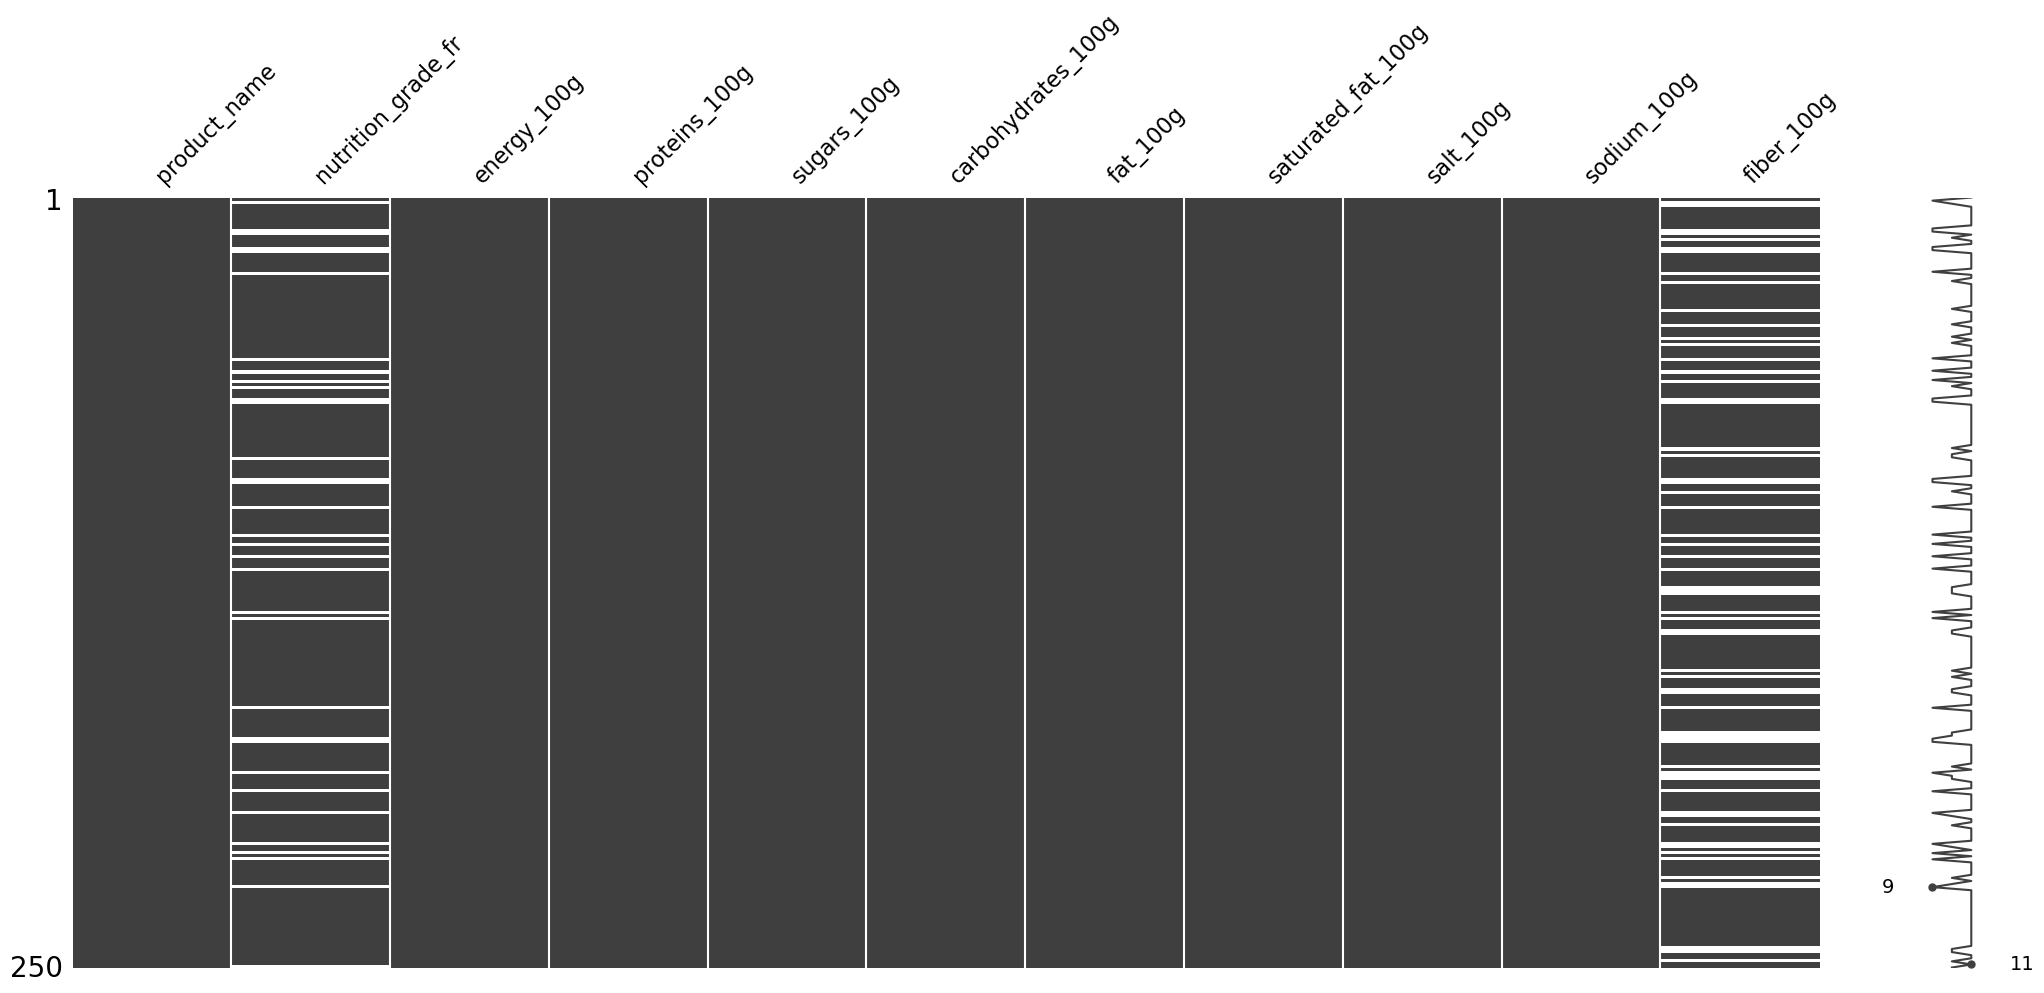

In [229]:
msno.matrix(df.sample(250))

#### Pour la variable 'fiber_100g' nous allons observer la répartition de ses valeurs pour déterminer si nous remplacerons les valeurs manquantes par la moyenne ou la médiane.

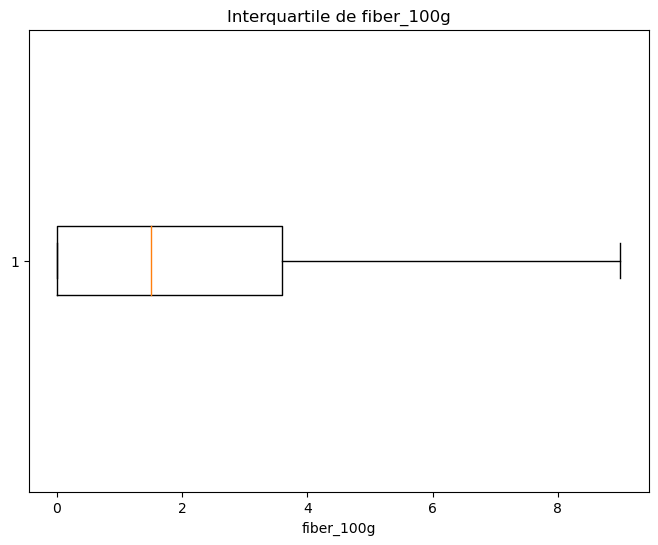

In [230]:
import matplotlib.pyplot as plt
df_fiber = pd.DataFrame(df['fiber_100g'])
df_temporary_fiber = df_fiber.dropna().copy()

plt.figure(figsize=(8, 6))
plt.boxplot(df_temporary_fiber.values, vert=False, showfliers=False)
plt.xlabel('fiber_100g')
plt.title('Interquartile de fiber_100g')

plt.show()

#### On peut constater une asymétrie dans la répartition des valeurs de la variable 'fiber_100g' il est donc préférable d'utiliser la médiane comme méthode de remplacement des valeurs nuls

In [231]:
median_fiber = df[df['fiber_100g'].notnull()]['fiber_100g'].median()
df['fiber_100g'] = df['fiber_100g'].fillna(median_fiber)

In [232]:
df.isnull().sum()

product_name              0
nutrition_grade_fr    32569
energy_100g               0
proteins_100g             0
sugars_100g               0
carbohydrates_100g        0
fat_100g                  0
saturated_fat_100g        0
salt_100g                 0
sodium_100g               0
fiber_100g                0
dtype: int64

#### Il nous reste désormais à retrouver les valeurs des individus manquantes pour la variable 'nutrition_grade_fr'
#### Pour imputer des valeurs correspondantes à cette variable nous allons faire appel à un algorithme de K-Nearest-Neighbor

In [233]:
import pandas as pd
import numpy as np
from numpy import nan

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

#outils pour tester notre modèle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

#### On utilise seulement les individus qui ont toutes leurs valeurs pour entrainer l'algorithme KNN

In [234]:
df_index_drop = []
for i in df.itertuples():
    if pd.isna(i.nutrition_grade_fr):
        df_index_drop.append(i.Index)
        
df_without_Nan = df.drop(df_index_drop).copy()

#### Nous allons prendre un échantillon de 50.000 individus pour accélerer l'entrainement de notre modèle

In [235]:
df_without_Nan.shape

(217497, 11)

In [236]:
df_sample = df_without_Nan.sample(50000, replace=False)

#### Nous prenons les variables sur lesquels entrainer notre modèle et la variable que l'on souhaite retrouver
#### Nous divisons notre dataframe en un échantillon d'entrainement et un échantillon de 20% pour tester notre modèle

In [237]:
X = df_sample.iloc[:, 2:11]
y = df_sample.iloc[:, 1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

#### Nous mettons à l'échelle nos données 

In [238]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

#### Nous observons pour quel nombre de plus proches voisins il y a un bon compromis entre biais et variance, en l'occurence ici nous prendrons 3 plus proches voisins

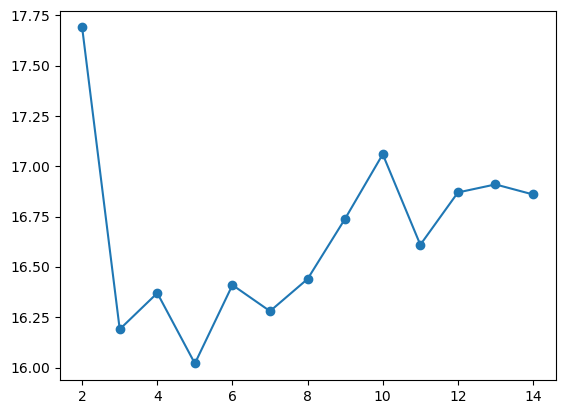

In [239]:
errors = []
for k in range(2,15):
    knn = KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(X_train, y_train).score(X_test, y_test)))
plt.plot(range(2,15), errors, 'o-')
plt.show()

#### Nous définissons notre modèle de classifieur 

In [240]:
classifier = KNeighborsClassifier(n_neighbors=3, p=2, metric='euclidean')

#### Nous adaptons notre classifier sur notre échantillon

In [241]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

#### Nous effectuons une prédictons sur la variable 'nutrion_grade_fr' avec le classifieur que nous avons paramétré juste au dessus

In [242]:
y_pred = classifier.predict(X_test)
y_pred

array(['d', 'c', 'd', ..., 'd', 'e', 'c'], dtype=object)

#### Nous vérifions le pourcentage de correspondance entre nos données prédite et ce que nous avions initialement dans le dataset pour vérifier la pertinence de notre modèle

In [243]:
print(accuracy_score(y_test, y_pred))

0.8381


#### Nous allons désormais pouvoir appliquer notre classifieur sur nos données manquantes
#### Nous conservons les individus dont il ne manque pas de valeurs pour l'entrainement de notre modèle, nous mettons à l'échelle nos échantillons puis nous paramétrons notre classifieur et enfin nous l'adaptons à nos données d'entrainement.

In [244]:
X = df_without_Nan.iloc[:, 2:11]
y = df_without_Nan.iloc[:, 1]

In [245]:
X_train = X
y_train = y
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)

In [246]:
classifier = KNeighborsClassifier(n_neighbors=3, p=2, metric='euclidean')

In [247]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

#### Nous utilisons notre modèle pour prédire nos données manquantes

In [248]:
X_test = df.iloc[:, 2:11]
values_predicted = classifier.predict(X_test)

/Applications/anaconda3/lib/python3.10/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [249]:
values_predicted

array(['e', 'e', 'e', ..., 'e', 'd', 'e'], dtype=object)

#### Et pour finir nous appliquons nos valeurs déduite par notre classifieur à nos données manquantes

In [250]:
values_predicted_serie = pd.Series(values_predicted, index=df.index)
df['nutrition_grade_fr'].fillna(values_predicted_serie, inplace=True)

#### Nous pouvons désormais que notre dataset à été entièrement nettoyé de ses valeurs manquantes

<Axes: >

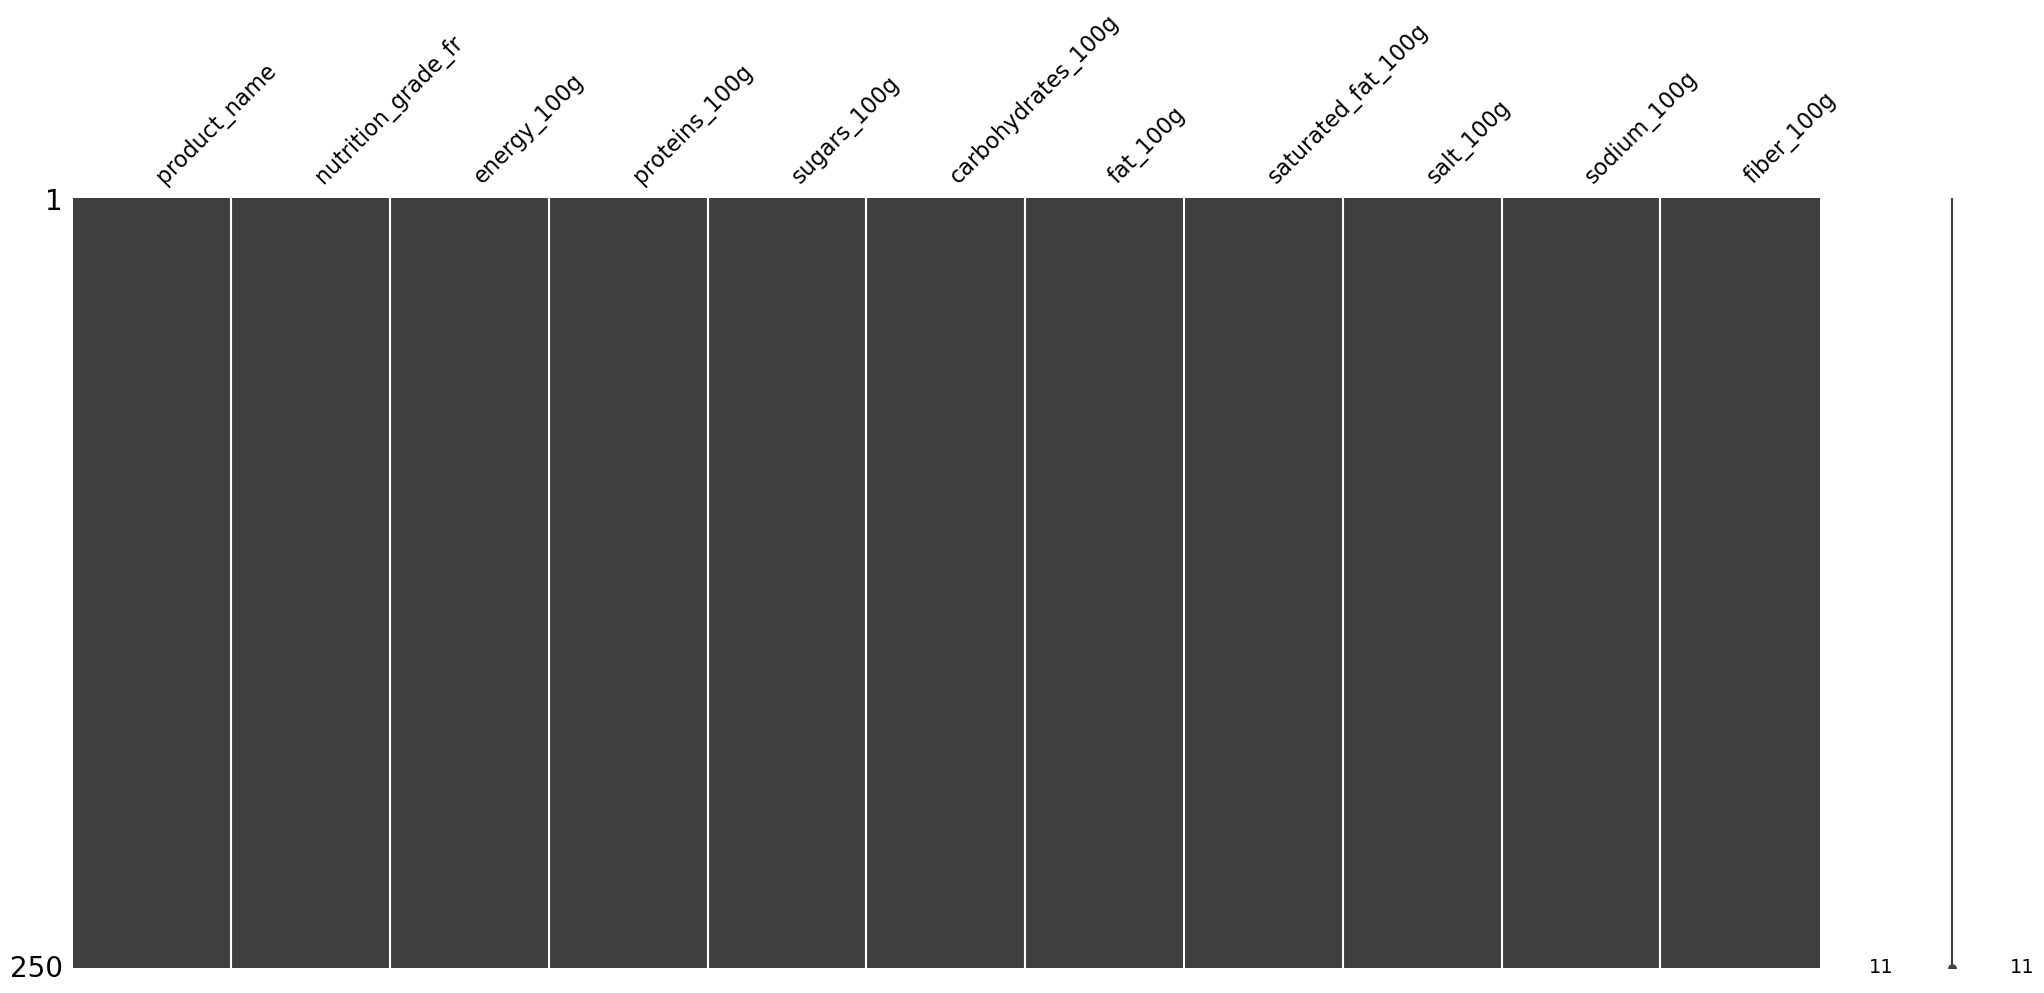

In [251]:
msno.matrix(df.sample(250))

#### Enfin nous pouvons supprimer les doublons qui ne nous servent à rien dans le jeu de données.

In [252]:
df.drop_duplicates(inplace=True)

## Conclusion du nettoyage du Dataset

Maintenant que les données sont nettoyées, il nous sera plus simple d'effectuer une analyse exploratoire du jeu de données.

## 2. Analyse exploratoire du Dataset

Lors du nettoyage de nos données nous avons dû supprimer près de 28% de nos individus pour parvenir à avoir un Dataset utilisable pour une analyse exploratoire. Voyons ce que nous pouvons en tirer.

In [253]:
df.describe()

,energy_100g,proteins_100g,sugars_100g,carbohydrates_100g,fat_100g,saturated_fat_100g,salt_100g,sodium_100g,fiber_100g
count,230863.000000,230863.000000,230863.000000,230863.000000,230863.000000,230863.000000,230863.000000,230863.000000,230863.000000
mean,1116.535509,7.158008,15.483088,32.440416,12.363772,4.598107,1.566199,0.616613,2.546196
std,766.511129,8.091727,20.653913,28.296976,15.919209,7.237406,5.951848,2.343238,4.069316
min,0.000000,0.000000,-0.950225,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,393.000000,0.800000,1.100000,7.100000,0.200000,0.000000,0.076200,0.030000,0.000000
50%,1100.000000,5.000000,5.400000,21.880000,5.880000,1.250000,0.600000,0.236220,1.500000
75%,1674.000000,10.000000,23.500000,57.140000,20.000000,6.600000,1.381760,0.544000,3.100000
max,4202.622118,100.000000,100.000000,113.115088,173.370573,100.000000,100.000000,39.370079,100.000000


## A. Analyse univariées

Nous commençons notre analyse exploratoire par une analyse univarié avec ici la répartition du nutriscore dans le Dataset

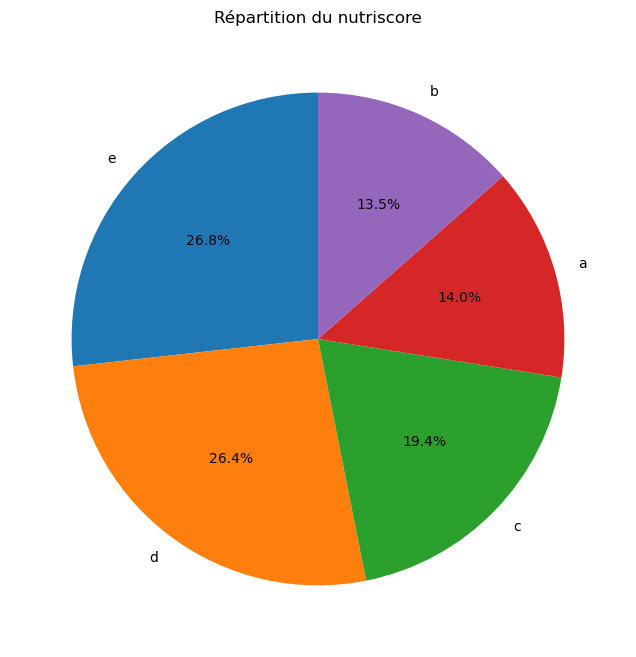

In [254]:
import pandas as pd
import matplotlib.pyplot as plt

values = df['nutrition_grade_fr'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(values, labels=values.index, autopct='%1.1f%%', startangle=90)

plt.title('Répartition du nutriscore')
plt.show()

#### Nous pouvons étudier une bonne répartition du nutriscore avec les paramètres les moins bon qui prennent plus d'un quart chacun du jeu de données. Nous pouvons également remarquer que le meilleur paramètres du nutriscore est le moins bien représenté du jeu de données. Ces observations peuvent s'expliquer par le fait qu'il existe peu de produits bon pour la santé dans le commerce que de produits mauvais.

#### Vient ensuite les variations des valeurs des différentes variables avec l'interquartile et la médiane

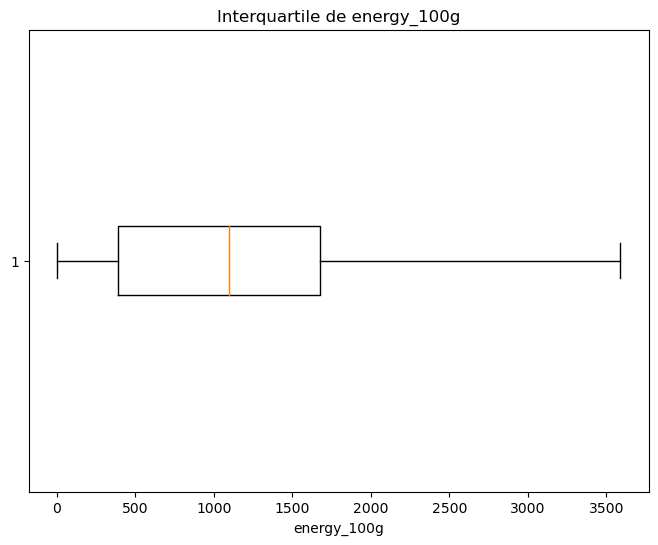

In [255]:
import matplotlib.pyplot as plt
df_energy = pd.DataFrame(df['energy_100g'])

plt.figure(figsize=(8, 6))
plt.boxplot(df_energy.values, vert=False, showfliers=False)
plt.xlabel('energy_100g')
plt.title('Interquartile de energy_100g')

plt.show()

#### Nous pouvons constater une médiane autour des 1000kJ et un interquartile asymétrique par rapport à la répartion des valeurs.

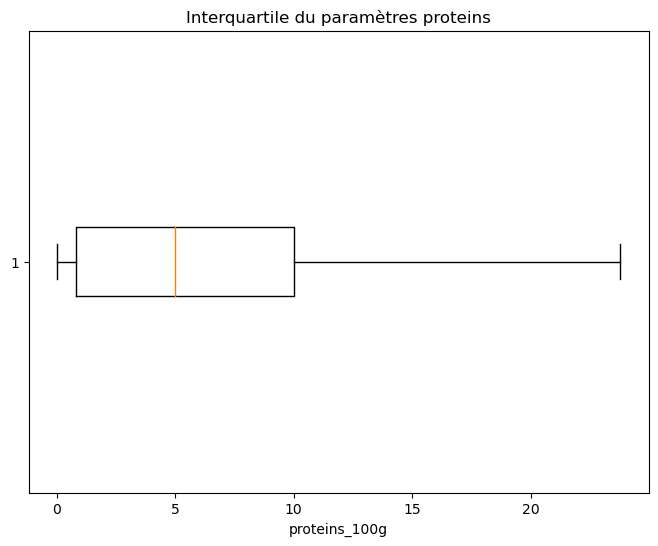

In [256]:
import matplotlib.pyplot as plt
df_proteins = pd.DataFrame(df['proteins_100g'])

plt.figure(figsize=(8, 6))
plt.boxplot(df_proteins.values, vert=False, showfliers=False)
plt.xlabel('proteins_100g')
plt.title('Interquartile du paramètres proteins')

plt.show()

#### Nous pouvons constater une médiane autour des 5 grammes et un interquartile asymétrique par rapport à la répartion des valeurs.

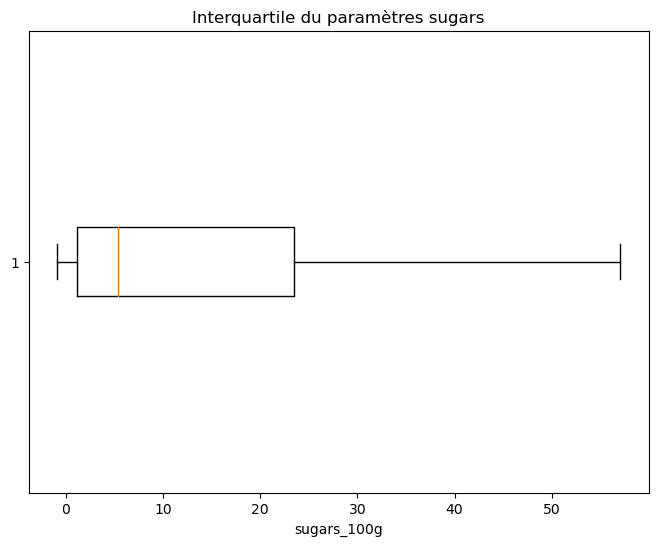

In [257]:
import matplotlib.pyplot as plt
df_sugars = pd.DataFrame(df['sugars_100g'])

plt.figure(figsize=(8, 6))
plt.boxplot(df_sugars.values, vert=False, showfliers=False)
plt.xlabel('sugars_100g')
plt.title('Interquartile du paramètres sugars')

plt.show()

#### Nous pouvons constater une médiane autour des 5 grammes et un interquartile asymétrique par rapport à la répartion des valeurs.

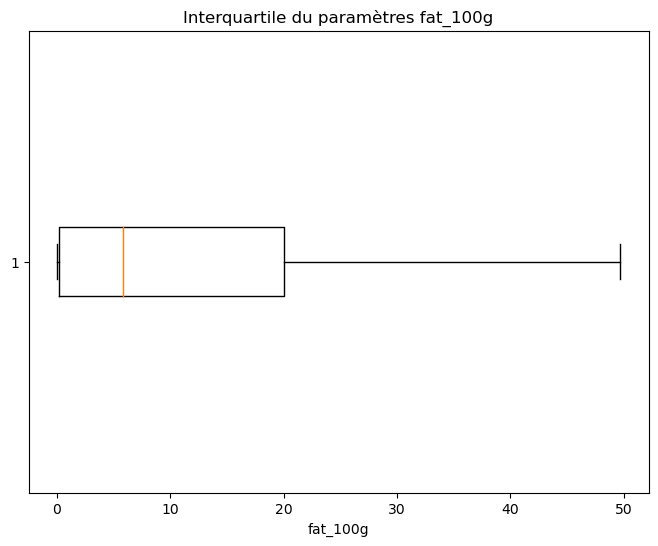

In [258]:
import matplotlib.pyplot as plt
df_fat = pd.DataFrame(df['fat_100g'])

plt.figure(figsize=(8, 6))
plt.boxplot(df_fat.values, vert=False, showfliers=False)
plt.xlabel('fat_100g')
plt.title('Interquartile du paramètres fat_100g')

plt.show()

#### Nous pouvons constater une médiane autour des 5 grammes et un interquartile asymétrique par rapport à la répartion des valeurs.

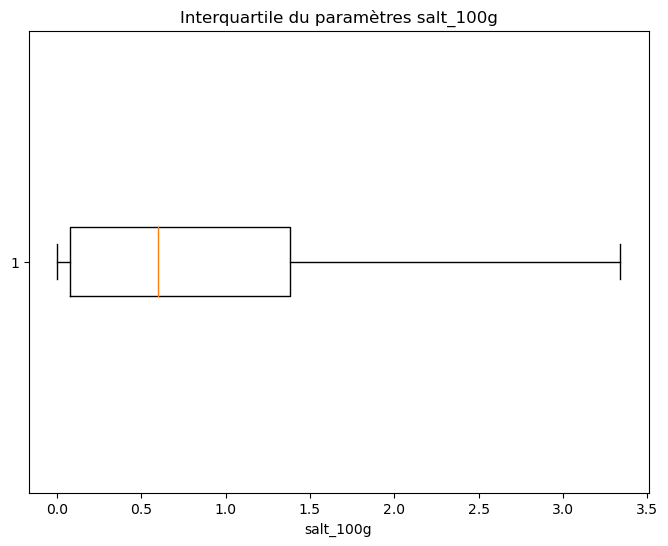

In [259]:
import matplotlib.pyplot as plt
df_salt = pd.DataFrame(df['salt_100g'])

plt.figure(figsize=(8, 6))
plt.boxplot(df_salt.values, vert=False, showfliers=False)
plt.xlabel('salt_100g')
plt.title('Interquartile du paramètres salt_100g')

plt.show()

#### Nous pouvons constater une médiane autour des 0.5 grammes et un interquartile asymétrique par rapport à la répartion des valeurs.

## B. Analyse bivariées

Passons ensuite par une analyse bivariée de notre jeu de données sur différentes variables en commençant par une heatmap de la corrélation de Pearson

/var/folders/kl/3nc79ycx61v13jbqlw61nnfw0000gn/T/ipykernel_18419/3668096534.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


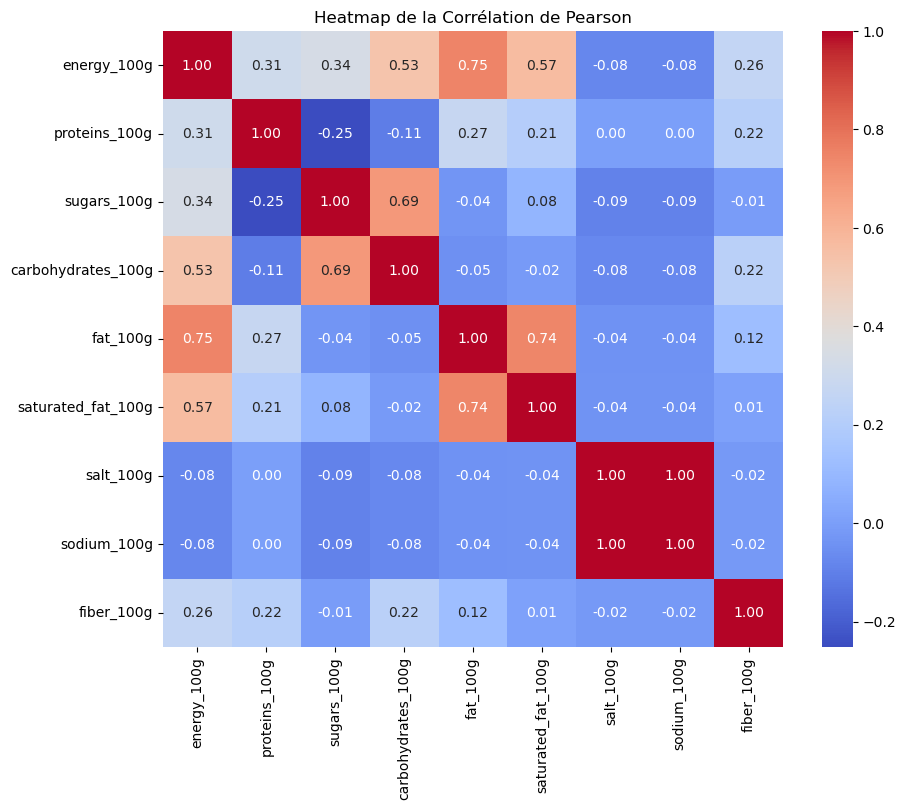

In [260]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap de la Corrélation de Pearson')
plt.show()

#### Nous pouvons de nouveau remarquer une corrélation entre les variables 'salt_100g' et 'sodium_100g' également entre les variables 'fat_100g' et 'satured_fat_100g, entre les variables 'energy_100g' et 'fat_100g' et enfin entre les variables 'carbohydrates_100g' et 'sugars_100g'

#### Nous effectuons ensuite une représentation graphique des paramètres quantitatifs corrélés entre eux par nuage de points

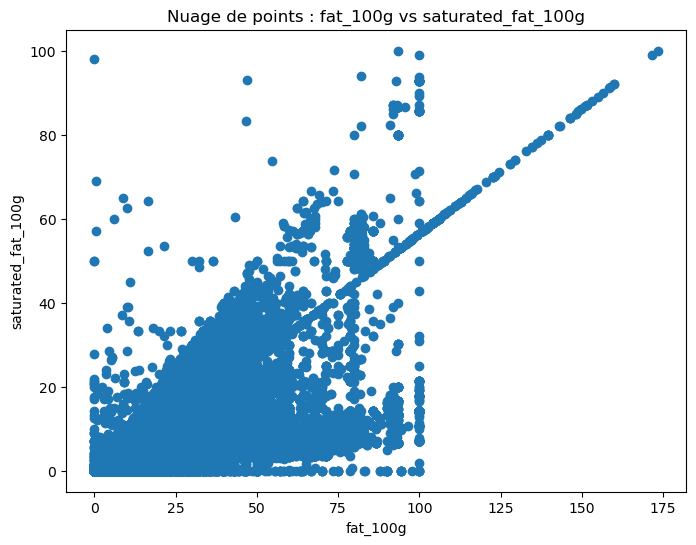

In [261]:
plt.figure(figsize=(8, 6))
plt.scatter(df['fat_100g'], df['saturated_fat_100g'])
plt.xlabel('fat_100g')
plt.ylabel('saturated_fat_100g')
plt.title('Nuage de points : fat_100g vs saturated_fat_100g')

plt.show()

In [262]:
df.describe()

,energy_100g,proteins_100g,sugars_100g,carbohydrates_100g,fat_100g,saturated_fat_100g,salt_100g,sodium_100g,fiber_100g
count,230863.000000,230863.000000,230863.000000,230863.000000,230863.000000,230863.000000,230863.000000,230863.000000,230863.000000
mean,1116.535509,7.158008,15.483088,32.440416,12.363772,4.598107,1.566199,0.616613,2.546196
std,766.511129,8.091727,20.653913,28.296976,15.919209,7.237406,5.951848,2.343238,4.069316
min,0.000000,0.000000,-0.950225,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,393.000000,0.800000,1.100000,7.100000,0.200000,0.000000,0.076200,0.030000,0.000000
50%,1100.000000,5.000000,5.400000,21.880000,5.880000,1.250000,0.600000,0.236220,1.500000
75%,1674.000000,10.000000,23.500000,57.140000,20.000000,6.600000,1.381760,0.544000,3.100000
max,4202.622118,100.000000,100.000000,113.115088,173.370573,100.000000,100.000000,39.370079,100.000000
